In [1]:
import statistics
from glob import glob
from math import hypot

import pandas as pd
from geopy import Point
from geopy.distance import distance
from matplotlib import pyplot as plt

from skybed.logger import SkybedLogFile

plt.rcParams['figure.dpi'] = 600

In [2]:
df = pd.read_csv("../precomputed_network_params.csv")
df

,distance,throughput,delay
0,0.000000,134.380160,121.123763
1,1.000000,134.996960,131.149062
2,2.828427,148.470613,122.787378
3,5.196152,180.599040,38.029783
4,8.000000,203.256160,7.940914
...,...,...,...
995,31385.902488,0.000000,0.000000
996,31433.229805,0.000000,0.000000
997,31480.580887,0.000000,0.000000
998,31527.955722,0.000000,0.000000


<Axes: xlabel='Distance [m]'>

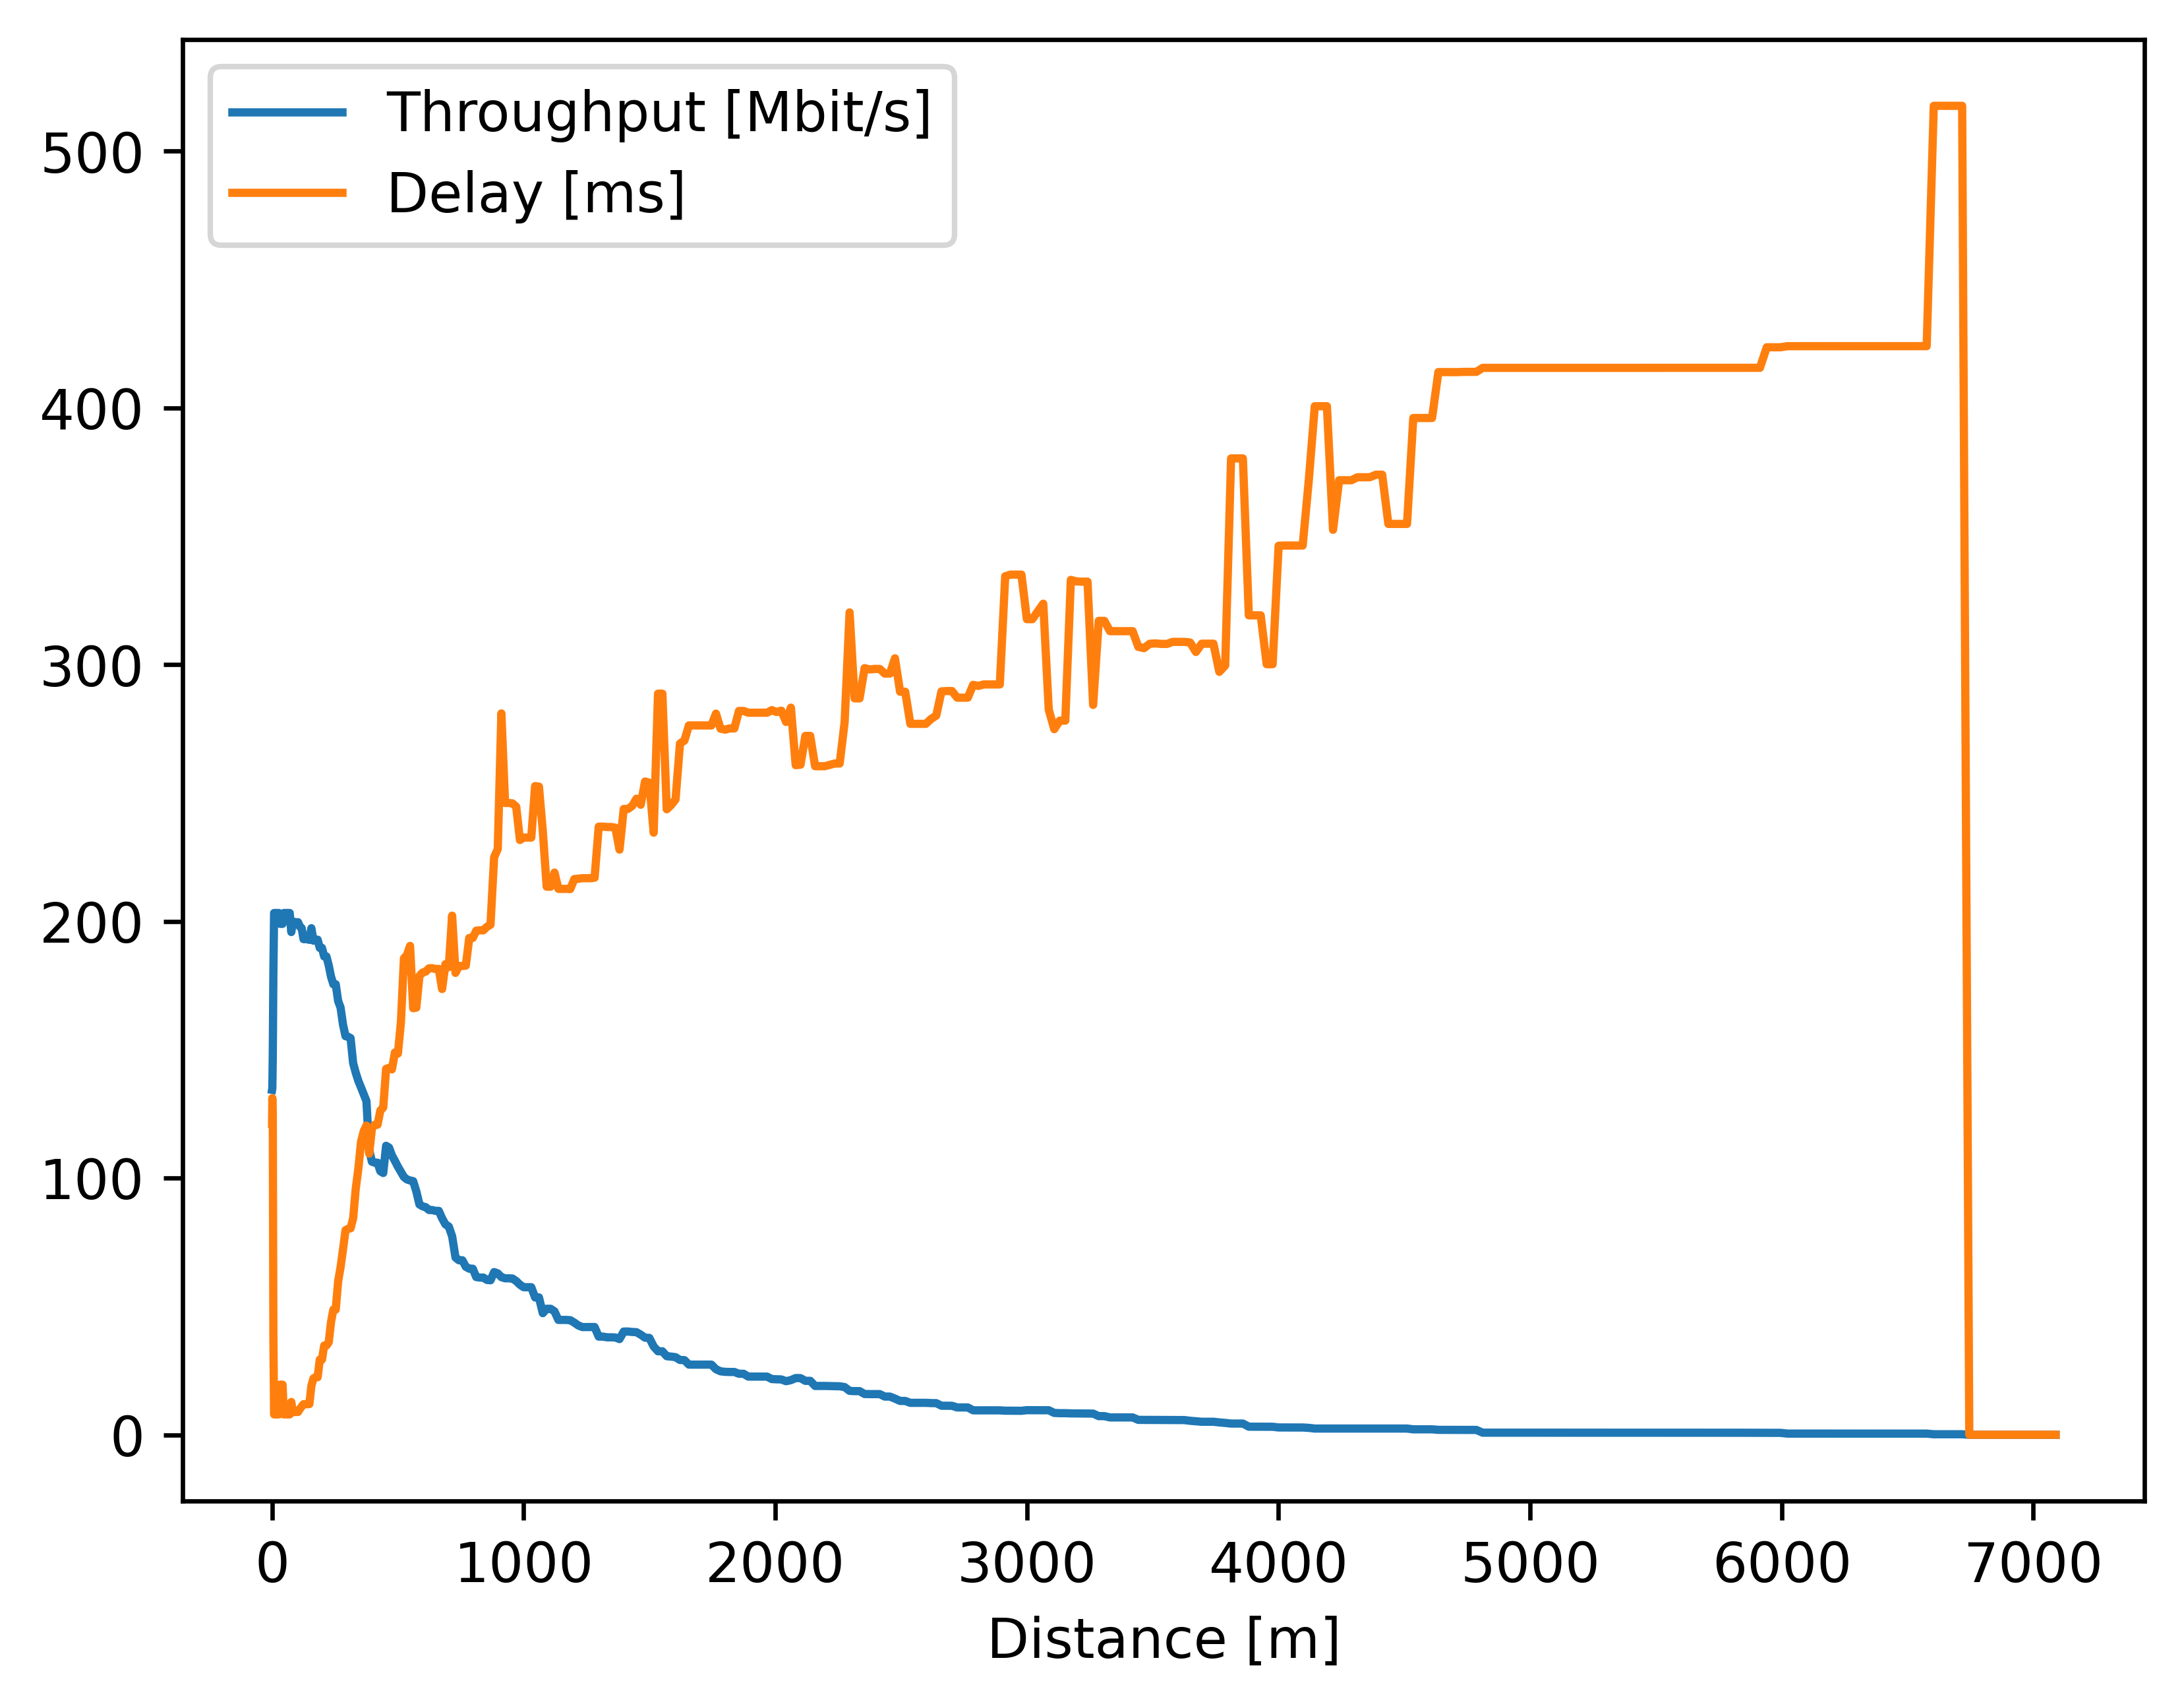

In [3]:
df.iloc[:370].plot(x="distance", y=["throughput", "delay"], label=["Throughput [Mbit/s]", "Delay [ms]"], xlabel="Distance [m]")

In [4]:
df = pd.read_csv("scalability_results.csv")
df["Total Requests"] = df["Successful"] + df["TimeoutError"]+ df["ConnectionRefusedError"] + df["ClientConnectionError"]
df

,uav_count,Successful,TimeoutError,ConnectionRefusedError,ClientConnectionError,Total Requests
0,20,17860,0,0,0,17860
1,40,35520,0,0,0,35520
2,60,52821,39,0,0,52860
3,80,69841,79,0,0,69920
4,100,86604,96,0,0,86700
5,120,102820,140,0,0,102960
6,140,117963,757,0,0,118720
7,160,133109,751,0,0,133860
8,180,140591,8269,0,0,148860
9,200,152686,9714,0,0,162400


<Axes: xlabel='Number of UAVs', ylabel='Number of Requests'>

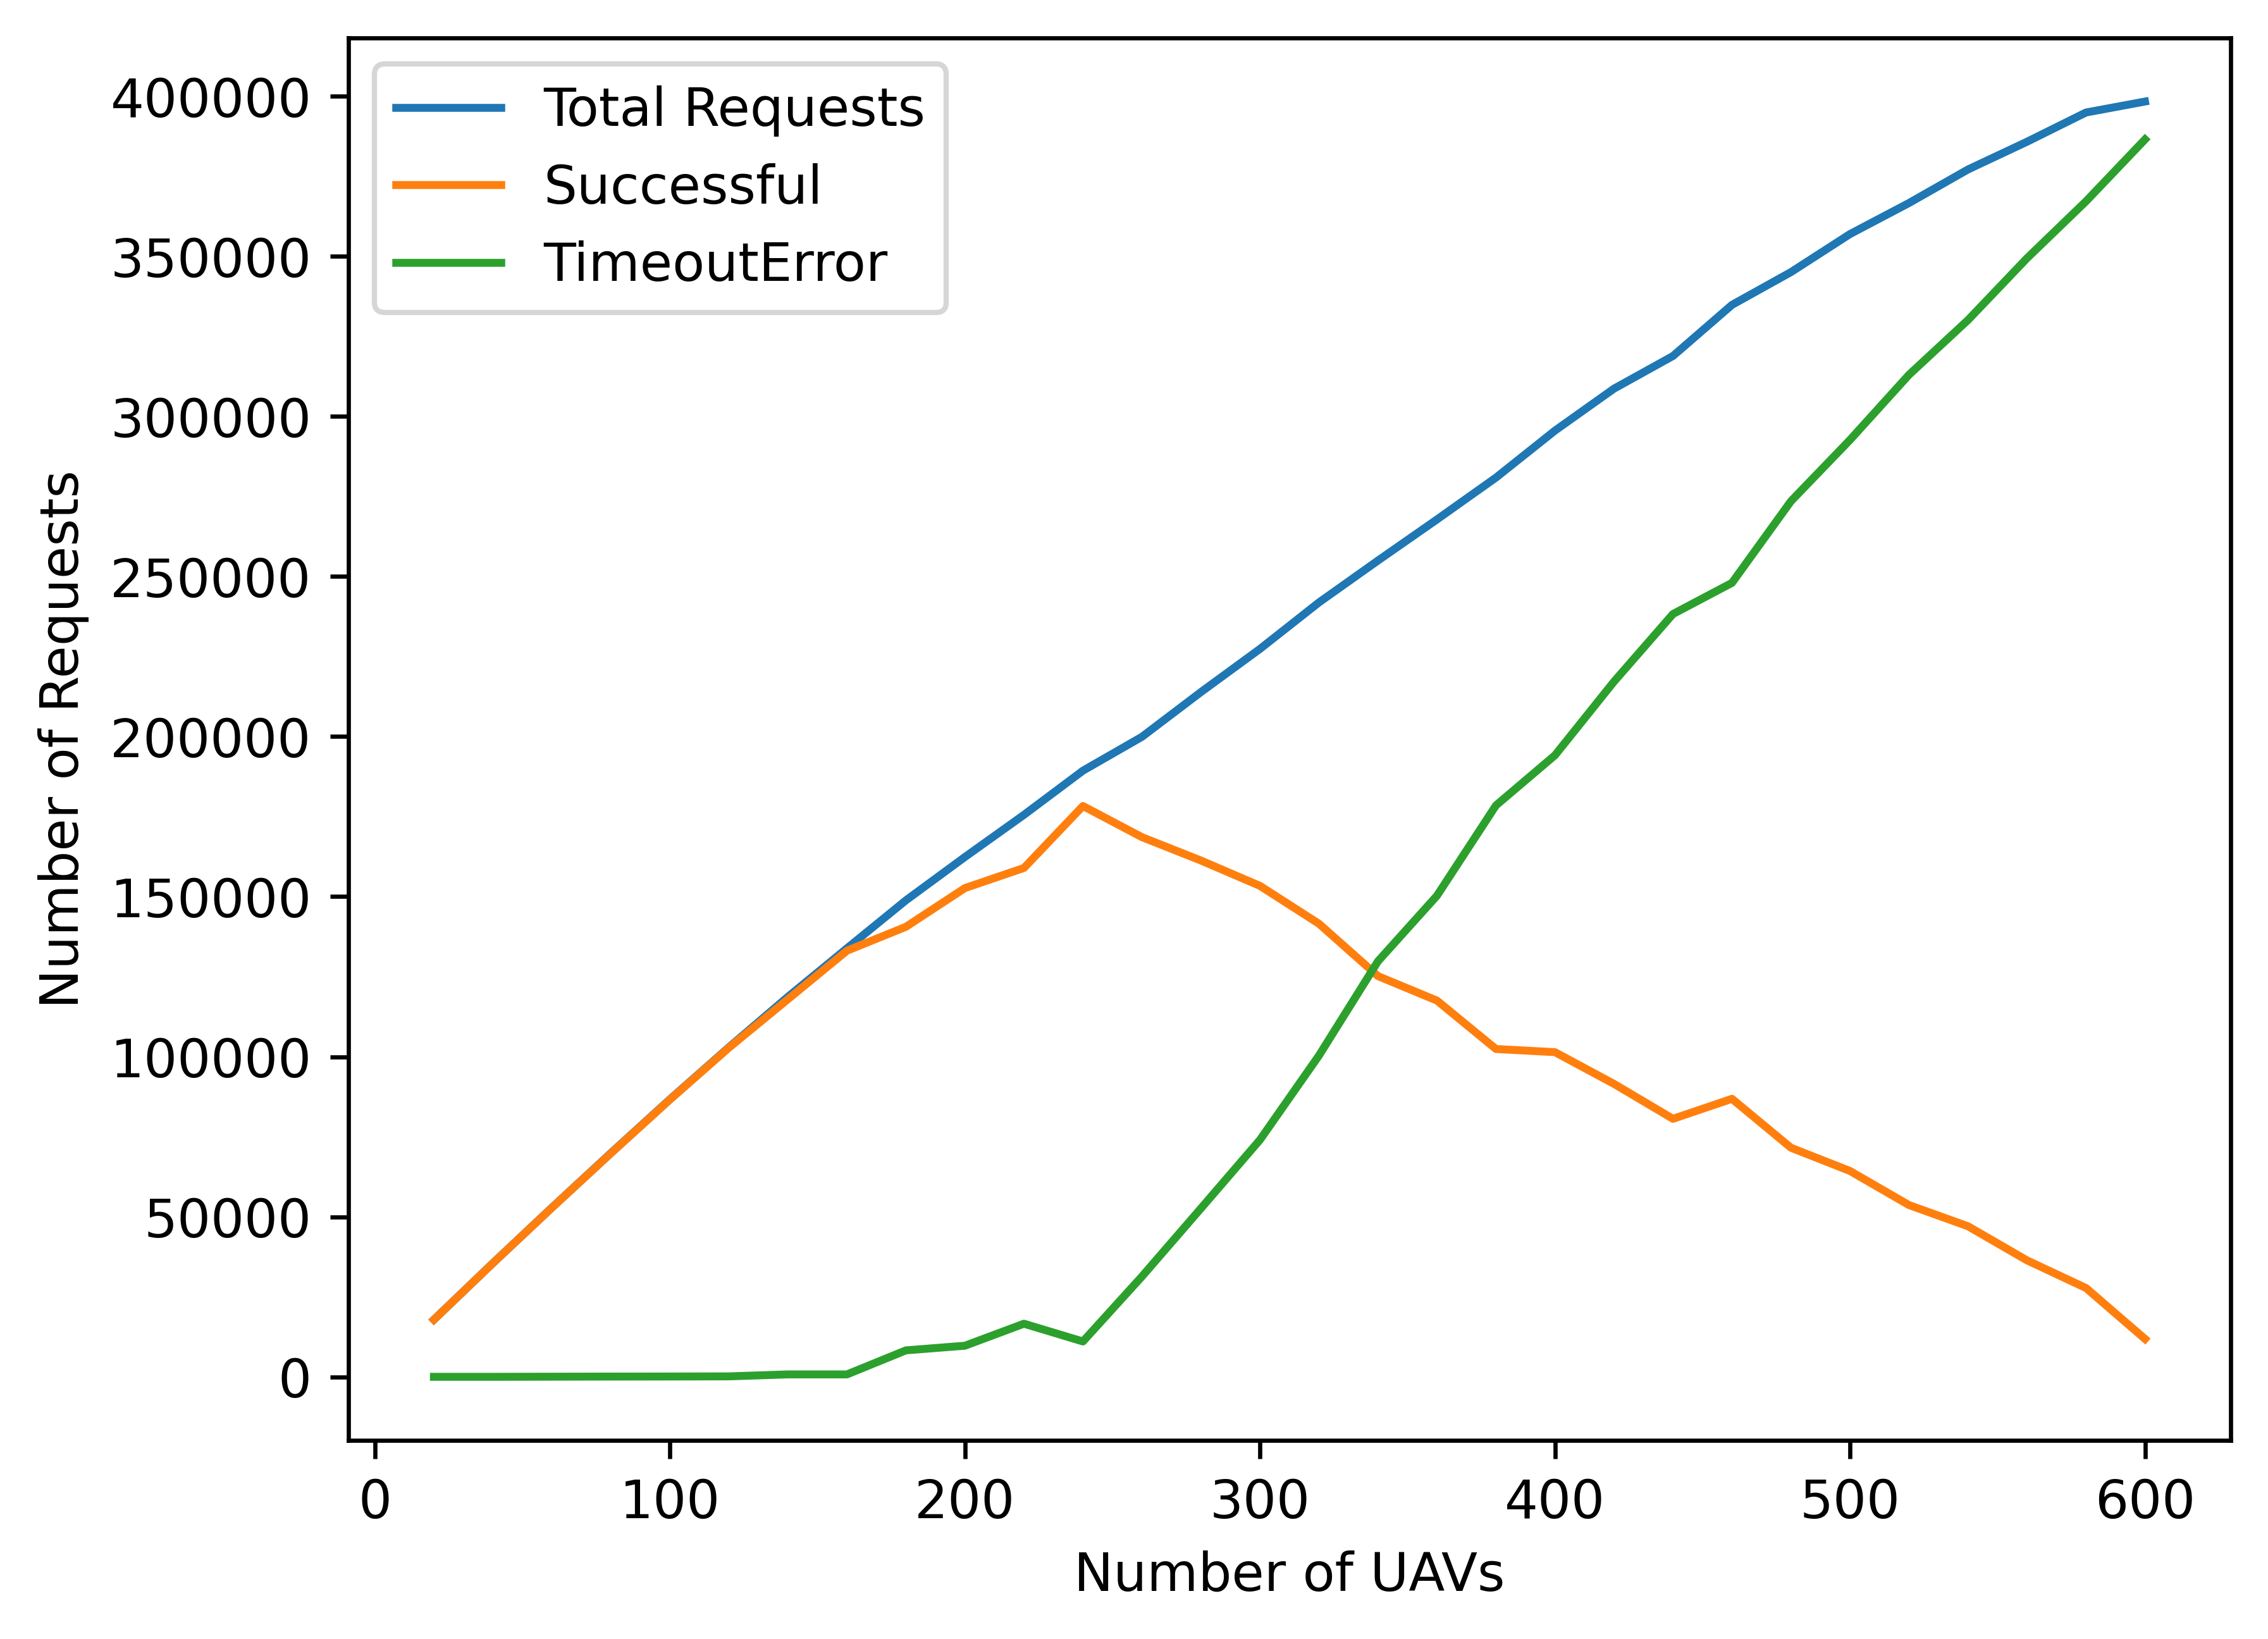

In [5]:
df.plot(x="uav_count", y=["Total Requests", "Successful", "TimeoutError"], xlabel="Number of UAVs", ylabel="Number of Requests")

In [6]:
df["Successful"] /= df["uav_count"]
df["TimeoutError"] /= df["uav_count"]
df["ConnectionRefusedError"] /= df["uav_count"]
df["ClientConnectionError"] /= df["uav_count"]
df["Total Requests"] = df["Successful"] + df["TimeoutError"] + df["ConnectionRefusedError"] + df[
    "ClientConnectionError"]
df

,uav_count,Successful,TimeoutError,ConnectionRefusedError,ClientConnectionError,Total Requests
0,20,893.000000,0.000000,0.0,0.0,893.000000
1,40,888.000000,0.000000,0.0,0.0,888.000000
2,60,880.350000,0.650000,0.0,0.0,881.000000
3,80,873.012500,0.987500,0.0,0.0,874.000000
4,100,866.040000,0.960000,0.0,0.0,867.000000
5,120,856.833333,1.166667,0.0,0.0,858.000000
6,140,842.592857,5.407143,0.0,0.0,848.000000
7,160,831.931250,4.693750,0.0,0.0,836.625000
8,180,781.061111,45.938889,0.0,0.0,827.000000
9,200,763.430000,48.570000,0.0,0.0,812.000000


<Axes: xlabel='Number of UAVs', ylabel='Requests per UAV'>

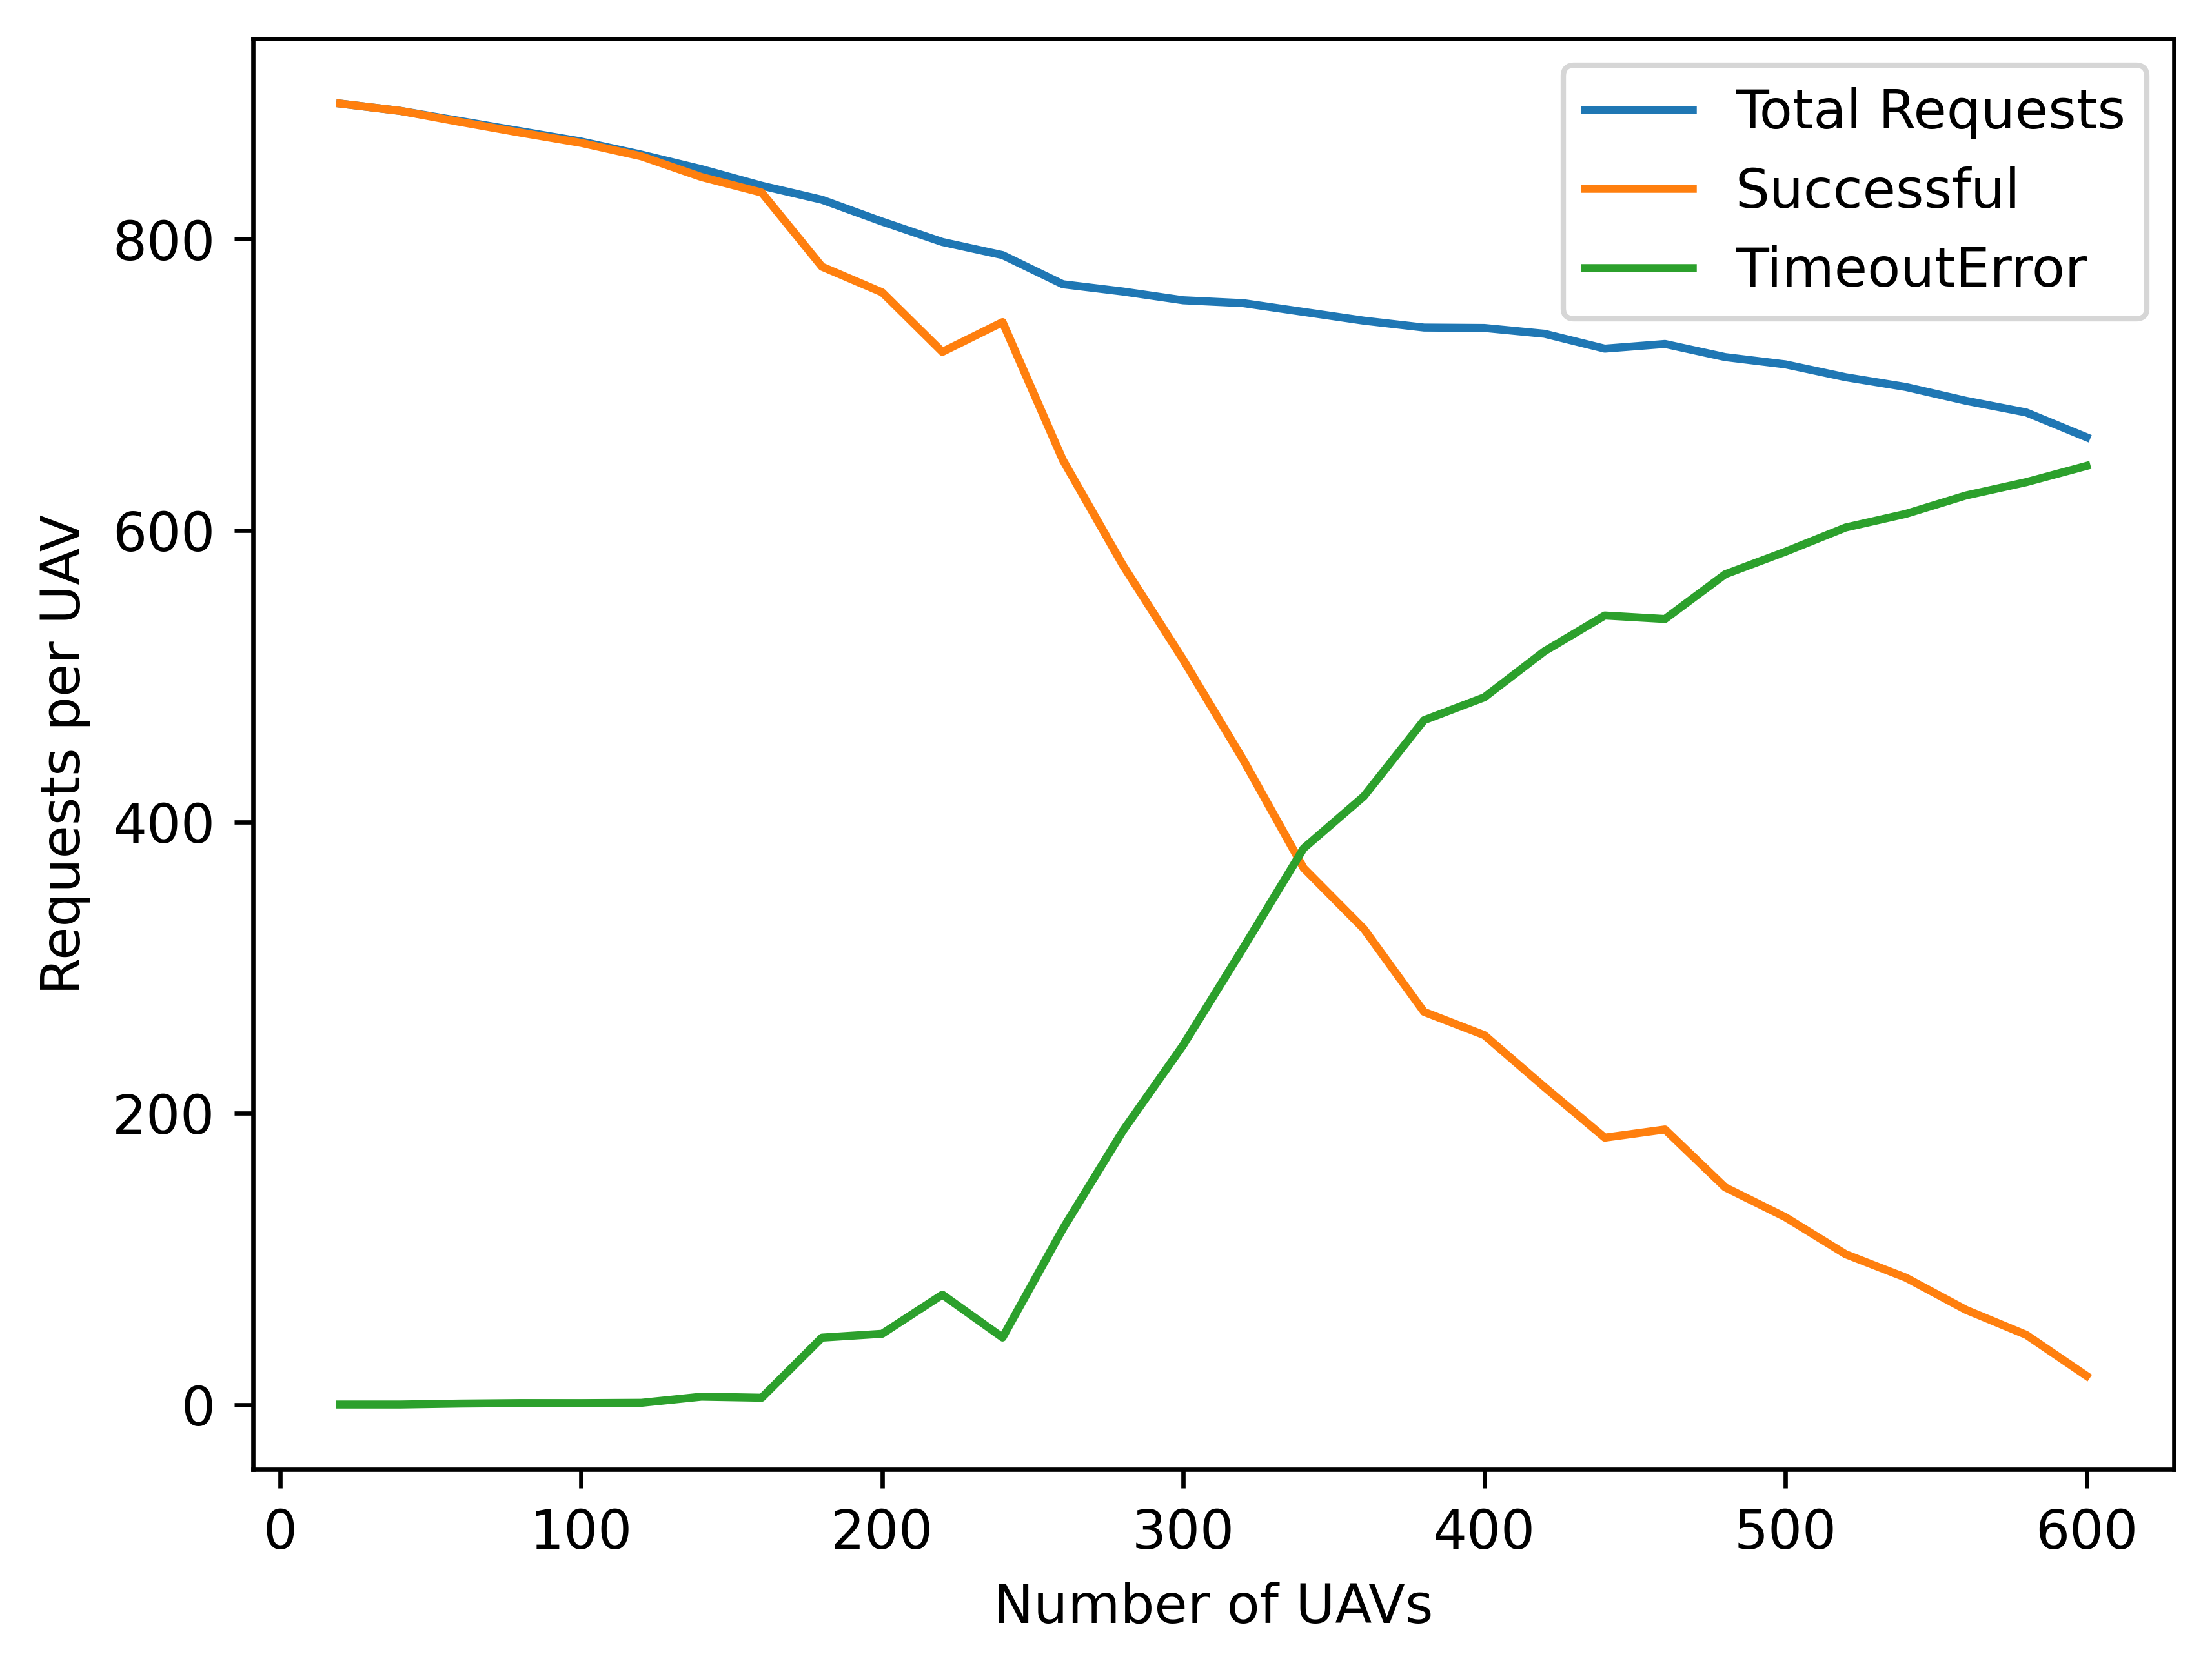

In [7]:
df.plot(x="uav_count", y=["Total Requests", "Successful", "TimeoutError"], xlabel="Number of UAVs", ylabel="Requests per UAV")

In [8]:
starting_points = [Point(52.20926387119226, 13.150638419142386, 280.9868274900829), Point(52.208051405942456, 13.15857518241892, 300.937371163478), Point(52.198012191049756, 13.158607849834379, 396.5570952075306), Point(52.20857977888169, 13.158389690474372, 336.79678638308826), Point(52.20181828847081, 13.15867314577977, 393.32127355415173), Point(52.20191562969281, 13.151386910791725, 202.80834003280378), Point(52.20676952788984, 13.140435781101301, 298.71557329306495), Point(52.209727489671614, 13.14423426654506, 313.50214812413435), Point(52.19714775273406, 13.142021841086065, 264.01092093450916), Point(52.20253424701217, 13.15454415291235, 309.48818226568477), Point(52.208664771427586, 13.152165265998521, 288.99780525510323), Point(52.20430117139342, 13.1442007512861, 237.34590565111102), Point(52.20463089775913, 13.155565003154342, 375.35407416455496), Point(52.210843054480684, 13.151224923213974, 278.259210046925), Point(52.20648110215885, 13.158313704063547, 317.96023670623197), Point(52.2113707316264, 13.160338081502085, 383.38824358949125), Point(52.20824193584436, 13.153015871523243, 369.01551513430303), Point(52.197236146603, 13.156304584149225, 266.5072298439311), Point(52.20869369609243, 13.141317606072326, 314.77320735783337), Point(52.21057575445574, 13.153112922913243, 321.2676835508438)]

In [9]:
points = [
    [Point(52.202593078540595, 13.344236695639959, -1093.3472237108883), Point(52.121906292980526, 13.077639397730394, -103.99148931064252), Point(52.19763363881912, 13.352242355438523, 2443.819914103527), Point(52.192712556319265, 12.955699432545257, -2953.1939553692346), Point(52.13201792142662, 13.063697672185702, -749.0870252470991), Point(52.24393390401135, 12.961452624189306, -3948.6263454840087), Point(52.15566944924817, 12.993297947023057, 5933.996298872912), Point(52.27641043747478, 13.029240416722802, -2716.615182777156), Point(52.07588780860028, 13.20884222328357, 5504.04359617599), Point(52.082449116914894, 13.089404081907302, -6450.2144153119125), Point(52.121013834784435, 13.044184316340322, 8331.958192449101), Point(52.178414853699486, 13.306850225642647, 1549.4068349213273), Point(52.30173561148069, 13.255731845395264, -31.34505910675692), Point(52.319881328636704, 13.057959650990629, 7188.155558086927), Point(52.2641917505165, 13.028056313845747, 5727.959267885593), Point(52.15165323051199, 13.006736657070325, -474.24298257309204), Point(52.118358736672675, 13.165494955321057, 2326.163293525182), Point(52.21898891381331, 13.344882888562372, -6352.015670323895), Point(52.17941191185624, 13.001660212605756, -5800.678715577199), Point(52.31878923600754, 13.182978032572413, 3454.2724265476)],
[Point(52.20254357613245, 13.345673234452585, -1103.545832732225), Point(52.12126900242849, 13.077041231421902, -106.98707917913913), Point(52.197631143679075, 13.353518647631633, 2457.3139797244935), Point(52.19270706250166, 12.955629266296722, -2954.333069953319), Point(52.131750855318764, 13.063334569910834, -753.4580153729698), Point(52.24389802672182, 12.961614876596274, -3945.0816316778037), Point(52.15544911314379, 12.992663877813662, 5958.29470316366), Point(52.27667662613553, 13.02878102968622, -2728.711040875036), Point(52.07558191235269, 13.209010556735103, 5517.262221036546), Point(52.08205185709882, 13.089188881298046, -6472.576306524703), Point(52.12102798844401, 13.044201735599053, 8330.659444520372), Point(52.1783467929336, 13.307277741097744, 1552.8565211672528), Point(52.30193061275201, 13.255933217829044, -32.1617805848305), Point(52.32010249445063, 13.05777024355533, 7202.171251958697), Point(52.26429147811052, 13.027831073558115, 5737.30812914081), Point(52.151638084192946, 13.006697724985735, -474.4605049039149), Point(52.118441611427755, 13.165483460923852, 2324.3587638445333), Point(52.21904528758753, 13.345371722628052, -6369.168053988198), Point(52.179358403650745, 13.00140509362257, -5811.8537873275645), Point(52.31877676108312, 13.182974585475682, 3453.911248282475)],
[Point(52.20255097836175, 13.34545842501201, -1102.0208070841747), Point(52.121336714552896, 13.077104786187112, -106.66879775561137), Point(52.19763283337047, 13.352654351522707, 2448.1758931811723), Point(52.192723910208954, 12.95584444281964, -2950.8397852287935), Point(52.131953568148674, 13.063610177463056, -750.140275879839), Point(52.24404638416096, 12.960943940119117, -3959.7395022818405), Point(52.15551509614927, 12.992853759173752, 5951.018175675522), Point(52.2765827677074, 13.028943010400537, -2724.4460273260725), Point(52.07560997622925, 13.208995113347118, 5516.049503159431), Point(52.081810167547296, 13.089057955988, -6486.181093486331), Point(52.12083792501291, 13.043967820299596, 8348.099773849024), Point(52.178429779305844, 13.306756472166136, 1548.650324779677), Point(52.301677335237464, 13.25567166529936, -31.100981423654453), Point(52.3199466730826, 13.057903689801206, 7192.296558549041), Point(52.26405346158322, 13.028368646208314, 5714.995513611693), Point(52.15161467624522, 13.006637557244613, -474.796675778823), Point(52.11830486808127, 13.165502426667812, 2327.3362378176034), Point(52.21905032096019, 13.345415368556878, -6370.699516815368), Point(52.17933943871699, 13.001314671777962, -5815.814572251745), Point(52.318754306219105, 13.182968380704013, 3453.2611274052497)],
[Point(52.20256424068915, 13.345073558008378, -1099.2884694647512), Point(52.12145819806841, 13.077218811154372, -106.0977634369292), Point(52.19763236060716, 13.352896175307785, 2450.7326635093555), Point(52.19267336708685, 12.955198913494918, -2961.31963940237), Point(52.13201470376275, 13.063693297446587, -749.1396877787361), Point(52.24385245286724, 12.961820980816462, -3940.578887113165), Point(52.155542196311984, 12.992931746242201, 5948.029601885751), Point(52.27657199706801, 13.028961598329484, -2723.956599541765), Point(52.07545001213084, 13.20908314052892, 5522.961995058988), Point(52.0823379952907, 13.089343885740213, -6456.469489777029), Point(52.1208177054986, 13.043942935751845, 8349.955128032923), Point(52.1783575393704, 13.307210238700858, 1552.3118338652646), Point(52.3015899208715, 13.255581395303624, -30.73486489900075), Point(52.31967021580653, 13.058140448116154, 7174.7769412093285), Point(52.264141221868194, 13.028170435398572, 5723.222511516284), Point(52.1517757780012, 13.007051653513408, -472.4830291691615), Point(52.118561779820425, 13.165466794010035, 2321.742195807593), Point(52.21903018746949, 13.345240784871194, -6364.5736655066885), Point(52.179349598502945, 13.001363112047088, -5813.69272318522), Point(52.31861458706334, 13.182929773306403, 3449.2159308358487)],
[Point(52.20257010078728, 13.344903500458653, -1098.081157493378), Point(52.12149205412962, 13.077250588659483, -105.93862272516532), Point(52.19763160768768, 13.353281302071302, 2454.8045569949804), Point(52.19268142468606, 12.955301823917926, -2959.6489380123794), Point(52.131953568148674, 13.063610177463056, -750.140275879839), Point(52.24385633149316, 12.961803440039986, -3940.9620994165384), Point(52.15583322848615, 12.993769262527893, 5915.934918143425), Point(52.276598154335076, 13.028916456208526, -2725.145209875083), Point(52.07537143327391, 13.209126381836324, 5526.35760511491), Point(52.082093527710185, 13.089211454698837, -6470.230653600284), Point(52.1208945396526, 13.044037497093248, 8342.904782134106), Point(52.17849186982812, 13.306366457366995, 1545.5032425904117), Point(52.301809577480924, 13.255808227938424, -31.65485001223313), Point(52.31952444741938, 13.0582652837245, 7165.539324793844), Point(52.26406409919358, 13.028344620676465, 5715.992725478916), Point(52.15185288653234, 13.007249853965849, -471.3756427576996), Point(52.11853070178808, 13.16547110442308, 2322.418894437836), Point(52.21900351059414, 13.34500946160928, -6356.456912522688), Point(52.179428844832564, 13.00174094652498, -5797.142300466324), Point(52.31842995817393, 13.182878756574626, 3443.8704925119973)],
[Point(52.20262561750654, 13.343292427825155, -1086.6434651330003), Point(52.1223145572046, 13.078022602505612, -102.07243955113688), Point(52.19763515341327, 13.35146762365137, 2435.628779533607), Point(52.19281071252652, 12.956953070976875, -2932.8417748002603), Point(52.132764419398406, 13.064712620180666, -736.8693179073157), Point(52.24354022347071, 12.96323300830612, -3909.7302966915972), Point(52.156275078925745, 12.995040805791355, 5867.208171571069), Point(52.27594576128679, 13.0300423458792, -2695.499869797042), Point(52.076847593053415, 13.208314050306793, 5462.56864477865), Point(52.08342420907653, 13.089932309685127, -6395.326136880518), Point(52.121656815283814, 13.044975653947205, 8272.957929401107), Point(52.1786459020828, 13.30539891830908, 1537.6960579285803), Point(52.30096457190773, 13.254935622826297, -28.115723607247347), Point(52.3188106849197, 13.058876541816305, 7120.306858207677), Point(52.2635175919364, 13.02957892493596, 5664.76096580033), Point(52.152376122966984, 13.00859479465255, -463.8612349656367), Point(52.119452683344825, 13.165343227561422, 2302.343501740621), Point(52.21879764564691, 13.343224349023275, -6293.82008289144), Point(52.179664551857776, 13.002864765864295, -5747.9154021229415), Point(52.31754423842078, 13.182634017097467, 3418.226835688116)],
[Point(52.20264335201396, 13.342777779199691, -1082.989757851213), Point(52.1226730330851, 13.078359077878199, -100.38742025010754), Point(52.1976372108098, 13.350415242279803, 2424.5020938461435), Point(52.19285686059351, 12.957542469104158, -2923.2732122939515), Point(52.132698457297, 13.064622936592741, -737.9488998058741), Point(52.24350628549178, 12.963386488957825, -3906.377189037079), Point(52.15642236239821, 12.995464656343568, 5850.965922713617), Point(52.27576881504662, 13.030347714048503, -2687.459270483422), Point(52.07698229963077, 13.208239919859754, 5456.747598968497), Point(52.08360478168121, 13.090030130907229, -6385.161640874704), Point(52.12199245916428, 13.045388746655767, 8242.159049948381), Point(52.17877724741295, 13.304573882363773, 1531.0387686820575), Point(52.300426637262035, 13.254380126898253, -25.862698840147644), Point(52.3183256279603, 13.059291933428245, 7089.567893238908), Point(52.26333941194372, 13.029981346888837, 5648.057667024344), Point(52.15253584776403, 13.009005358634933, -461.56736311332276), Point(52.119755176138476, 13.165301271881425, 2295.7569684062537), Point(52.218728185100844, 13.342622039059373, -6272.685895876495), Point(52.17975463528749, 13.003294273100472, -5729.101673733086), Point(52.31711759590038, 13.182516130247787, 3405.874539020838)],
[Point(52.20262345852302, 13.343355080687308, -1087.0882642803483), Point(52.12244400683071, 13.078144107189905, -101.46396035909851), Point(52.197634663139986, 13.35171840388593, 2438.2802450591303), Point(52.19282902525158, 12.957186959049581, -2929.0447261866457), Point(52.13247161201556, 13.064314513557303, -741.6616082862824), Point(52.24361100839742, 12.962912891141459, -3916.723921228164), Point(52.15626683105119, 12.995017070201786, 5868.1177375070865), Point(52.275898062735585, 13.030124662635885, -2693.3324038951096), Point(52.076505213822124, 13.208502464188761, 5477.363802879456), Point(52.083357536113326, 13.08989619117983, -6399.079181559588), Point(52.121867098199154, 13.045234458654608, 8253.662245888556), Point(52.17866858900369, 13.305256412273954, 1536.5461625132718), Point(52.30060146602733, 13.25456066233654, -26.594931889455047), Point(52.31882827765843, 13.058861475713934, 7121.421742947477), Point(52.26358141760407, 13.029434773396316, 5670.744237003669), Point(52.15224118304878, 13.008247940019306, -465.799161185695), Point(52.119376024209664, 13.16535386012015, 2304.012691695221), Point(52.21880720905536, 13.343307275831025, -6296.729862263062), Point(52.17963136322549, 13.002706526574983, -5754.846775740257), Point(52.31756918827483, 13.182640911100368, 3418.949192218366)],
[Point(52.20260418188443, 13.343914481107674, -1091.0596852388128), Point(52.12265909235681, 13.078345992674384, -100.4529487784809), Point(52.19763673804649, 13.350657066088637, 2427.0588641743266), Point(52.19285319804852, 12.957495691452712, -2924.0326220166744), Point(52.132756375239744, 13.064701683150645, -737.0009742364082), Point(52.243449075755514, 12.963645213219968, -3900.7248075623197), Point(52.15612543891403, 12.994610175063011, 5883.7102964102405), Point(52.27594576128679, 13.0300423458792, -2695.499869797042), Point(52.07604496629926, 13.20875573959502, 5497.252376064145), Point(52.08311862465585, 13.089766766977819, -6412.527591659587), Point(52.121543586018625, 13.04483629807089, 8283.347912830943), Point(52.178705604505915, 13.305023902271556, 1534.670017361979), Point(52.30079646733628, 13.254762029625725, -27.41165336752869), Point(52.319059496505176, 13.058663463527655, 7136.074513813418), Point(52.2636625293891, 13.029251580516027, 5678.347977491245), Point(52.152073196615724, 13.007816142859582, -468.2116815820942), Point(52.119481689503836, 13.165339204426333, 2301.711916352394), Point(52.21879663897235, 13.343215619886651, -6293.513790326006), Point(52.17964965083926, 13.002793719638195, -5751.027447420512), Point(52.317484358770706, 13.18261747150632, 3416.4931800155155)],
[Point(52.20262592593276, 13.343283477416028, -1086.5799223976649), Point(52.122173158379, 13.077889882406591, -102.73708605320957), Point(52.19763503084495, 13.351530318710271, 2436.291645914988), Point(52.192783975947805, 12.956611594563318, -2938.3854657761376), Point(52.132542400614945, 13.06441075887542, -740.5030325902685), Point(52.24366433950606, 12.962671706639874, -3921.9930903995496), Point(52.15605238630861, 12.994399946413147, 5891.766451843537), Point(52.27608270228645, 13.029806016635165, -2701.7225944832344), Point(52.076392958332086, 13.208564238918253, 5482.214674387917), Point(52.08324363646623, 13.0898344888578, -6405.490632886332), Point(52.121867098199154, 13.045234458654608, 8253.662245888556), Point(52.178660827688645, 13.305305164346764, 1536.93954778693), Point(52.300978020273234, 13.254949510310746, -28.17204922642484), Point(52.31879057893253, 13.058893760211687, 7119.032704219334), Point(52.26347238208801, 13.029681032151325, 5660.522815364632), Point(52.15217233615055, 13.0080709737737, -466.7878990530717), Point(52.11896579422622, 13.165410758367681, 2312.945113614431), Point(52.218788585575766, 13.343145786800774, -6291.063449802534), Point(52.17962391271618, 13.002671003485407, -5756.402798389042), Point(52.317604118070314, 13.182650562710943, 3419.9604913607163)],
[Point(52.202816379118204, 13.337756587947432, -1047.3422833280358), Point(52.12477808267364, 13.08033499051061, -90.49261246572968), Point(52.19764704253965, 13.34538620211841, 2371.3307405396686), Point(52.193343979056024, 12.963763931002491, -2822.271719171803), Point(52.13501356573038, 13.067770691046624, -700.0582082930546), Point(52.24233106164532, 12.96870123243924, -3790.263861114905), Point(52.15732491543681, 12.998062043079697, 5751.433421715151), Point(52.274288621072216, 13.032902137536686, -2620.1979092686215), Point(52.07911234697275, 13.207067702505926, 5364.702312095453), Point(52.08612446344594, 13.091395154381223, -6243.327827378194), Point(52.12442890964842, 13.048387494582174, 8018.58887078853), Point(52.17943934723713, 13.300414914163436, 1497.479978798449), Point(52.2982390358617, 13.252121179466204, -16.700398120608853), Point(52.315666610340905, 13.061568973602487, 6921.061028280582), Point(52.261944554948734, 13.033131594349964, 5517.298260934716), Point(52.15375581460482, 13.012141266487356, -444.04692810340765), Point(52.12131114909808, 13.165085454272324, 2261.876923652077), Point(52.21828071822889, 13.338741963337018, -6136.538850541092), Point(52.1803825099798, 13.006287930344577, -5597.971401421834), Point(52.31514905193997, 13.181972210868814, 3348.8806087840985)],
[Point(52.20282994987133, 13.337362768200949, -1044.5464029732768), Point(52.12460282786457, 13.08017048335181, -91.31639967956625), Point(52.197645370357556, 13.34624154206389, 2380.3741318856496), Point(52.19327658823372, 12.962903213423601, -2836.2448580699047), Point(52.13395173709736, 13.066326947413348, -717.4368437332637), Point(52.24242220937773, 12.96828903788464, -3799.2693502441825), Point(52.15754407320334, 12.998692748046976, 5727.264955415262), Point(52.27418860795235, 13.03307473064943, -2615.653222700054), Point(52.078901868020836, 13.207183536744475, 5373.797696173817), Point(52.086188358338845, 13.091429770088396, -6239.7311595607525), Point(52.12421862682503, 13.048128675035299, 8037.884554301081), Point(52.17941427222266, 13.300572423552227, 1498.7509158364217), Point(52.298234553071104, 13.252116550589843, -16.681622914216355), Point(52.31575960058041, 13.061489344065485, 6926.953990476667), Point(52.26186078373637, 13.033320786236983, 5509.445217480335), Point(52.15346390382628, 13.011390906016953, -448.23917666108485), Point(52.122112961900186, 13.164974237736574, 2244.4180989918023), Point(52.21822233109807, 13.338235679616988, -6118.773881745921), Point(52.18045769238179, 13.006646396983085, -5582.269718329549), Point(52.3145752050339, 13.181813658431473, 3332.2664085883443)],
[Point(52.202782760661684, 13.33873218634817, -1054.2684414795979), Point(52.12526202490342, 13.08078925794792, -88.21783640934007), Point(52.19764669234443, 13.345565330905451, 2373.224644486471), Point(52.193250950420655, 12.962575766860349, -2841.560726128965), Point(52.1342606327196, 13.066746942020913, -712.381240696112), Point(52.24238536242229, 12.968455669827568, -3795.628833362134), Point(52.157152888367236, 12.997566975759337, 5770.404368380655), Point(52.27394549913084, 13.03349426305759, -2604.6061384256896), Point(52.080414509920224, 13.206351062571526, 5308.432202597307), Point(52.08569108937163, 13.091160370889675, -6267.7226177921475), Point(52.12383243431227, 13.047653346155727, 8073.3218192135555), Point(52.17941546627097, 13.300564923107151, 1498.6903950250896), Point(52.29832645027755, 13.25221144264869, -17.066514645262554), Point(52.315568593600375, 13.061652907258132, 6914.849527587411), Point(52.26205757959837, 13.03287633488983, 5527.893637023962), Point(52.15419781155807, 13.013277434843184, -437.69923099484924), Point(52.12190370327257, 13.165003263433194, 2248.97453643544), Point(52.218236927880845, 13.338362250484739, -6123.215123944714), Point(52.18053152014501, 13.006998405351458, -5566.850948446133), Point(52.314260836705024, 13.181726800139511, 3323.164716307192)],
[Point(52.20280018674244, 13.33822648635162, -1050.678276933146), Point(52.124092995662735, 13.079691920740855, -93.71287157436353), Point(52.197644363546395, 13.346756537303538, 2385.8191057327062), Point(52.19314876542152, 12.961270660287003, -2862.7482573929346), Point(52.13456470183178, 13.067160377049847, -707.4046314564157), Point(52.24240863418364, 12.968350428616512, -3797.9281071823752), Point(52.15735790692907, 12.998156987715427, 5747.795157971082), Point(52.27381163540832, 13.033725270429027, -2598.523250249299), Point(52.080063711740834, 13.20654412495089, 5323.591176061247), Point(52.086624510414964, 13.091666061235992, -6215.1799922851715), Point(52.12425299997938, 13.048170981993328, 8034.730452188453), Point(52.179232179851994, 13.301716239075658, 1507.9803395645556), Point(52.29829507074382, 13.252179040460163, -16.93508820051507), Point(52.31660907891662, 13.060761909758227, 6980.7869964841475), Point(52.26178632043549, 13.033488956503957, 5502.464734409773), Point(52.15367457528582, 13.01193243925982, -445.21363878691216), Point(52.12175245693299, 13.165024242317411, 2252.2678031026235), Point(52.21817048735203, 13.337786135146208, -6102.999814626071), Point(52.18049359028517, 13.006817556942632, -5574.772518294493), Point(52.31465005463351, 13.181834339067887, 3334.433478179095)],
[Point(52.202756081794625, 13.339506399233999, -1059.7648880861127), Point(52.12400935131292, 13.079613407083952, -94.10604274460371), Point(52.197642971520395, 13.34746857418092, 2393.3473739212454), Point(52.19309895481202, 12.960634480389867, -2873.0762296219664), Point(52.13459205196275, 13.067197564465548, -706.9569999375012), Point(52.24256571857077, 12.967640049001862, -3813.4482054690025), Point(52.15748515982603, 12.998523203396505, 5733.761854958243), Point(52.274191685279135, 13.03306942009791, -2615.793059209856), Point(52.07969607522639, 13.20674645270031, 5339.477780251456), Point(52.08607723678556, 13.091369568890315, -6245.986234025869), Point(52.12390320257567, 13.04774044799895, 8066.828079569908), Point(52.17935636087917, 13.300936194897377, 1501.686175186025), Point(52.29893610975705, 13.252840975427546, -19.619942714642217), Point(52.316259737248856, 13.061061063422699, 6958.6485709366925), Point(52.26214002110615, 13.032690145227223, 5535.622028994941), Point(52.153410203256925, 13.01125286854037, -449.0103921976387), Point(52.12193478128703, 13.16499895269477, 2248.2978378051967), Point(52.21827870487955, 13.338724505266654, -6135.926265410224), Point(52.180423826435124, 13.006484925449477, -5589.342548551299), Point(52.31491951318425, 13.181908789647823, 3342.234928705797)]

]

In [10]:
points

[[Point(52.202593078540595, 13.344236695639959, -1093.3472237108883),
  Point(52.121906292980526, 13.077639397730394, -103.99148931064252),
  Point(52.19763363881912, 13.352242355438523, 2443.819914103527),
  Point(52.192712556319265, 12.955699432545257, -2953.1939553692346),
  Point(52.13201792142662, 13.063697672185702, -749.0870252470991),
  Point(52.24393390401135, 12.961452624189306, -3948.6263454840087),
  Point(52.15566944924817, 12.993297947023057, 5933.996298872912),
  Point(52.27641043747478, 13.029240416722802, -2716.615182777156),
  Point(52.07588780860028, 13.20884222328357, 5504.04359617599),
  Point(52.082449116914894, 13.089404081907302, -6450.2144153119125),
  Point(52.121013834784435, 13.044184316340322, 8331.958192449101),
  Point(52.178414853699486, 13.306850225642647, 1549.4068349213273),
  Point(52.30173561148069, 13.255731845395264, -31.34505910675692),
  Point(52.319881328636704, 13.057959650990629, 7188.155558086927),
  Point(52.2641917505165, 13.02805631384574

Text(0, 0.5, 'latitude [°]')

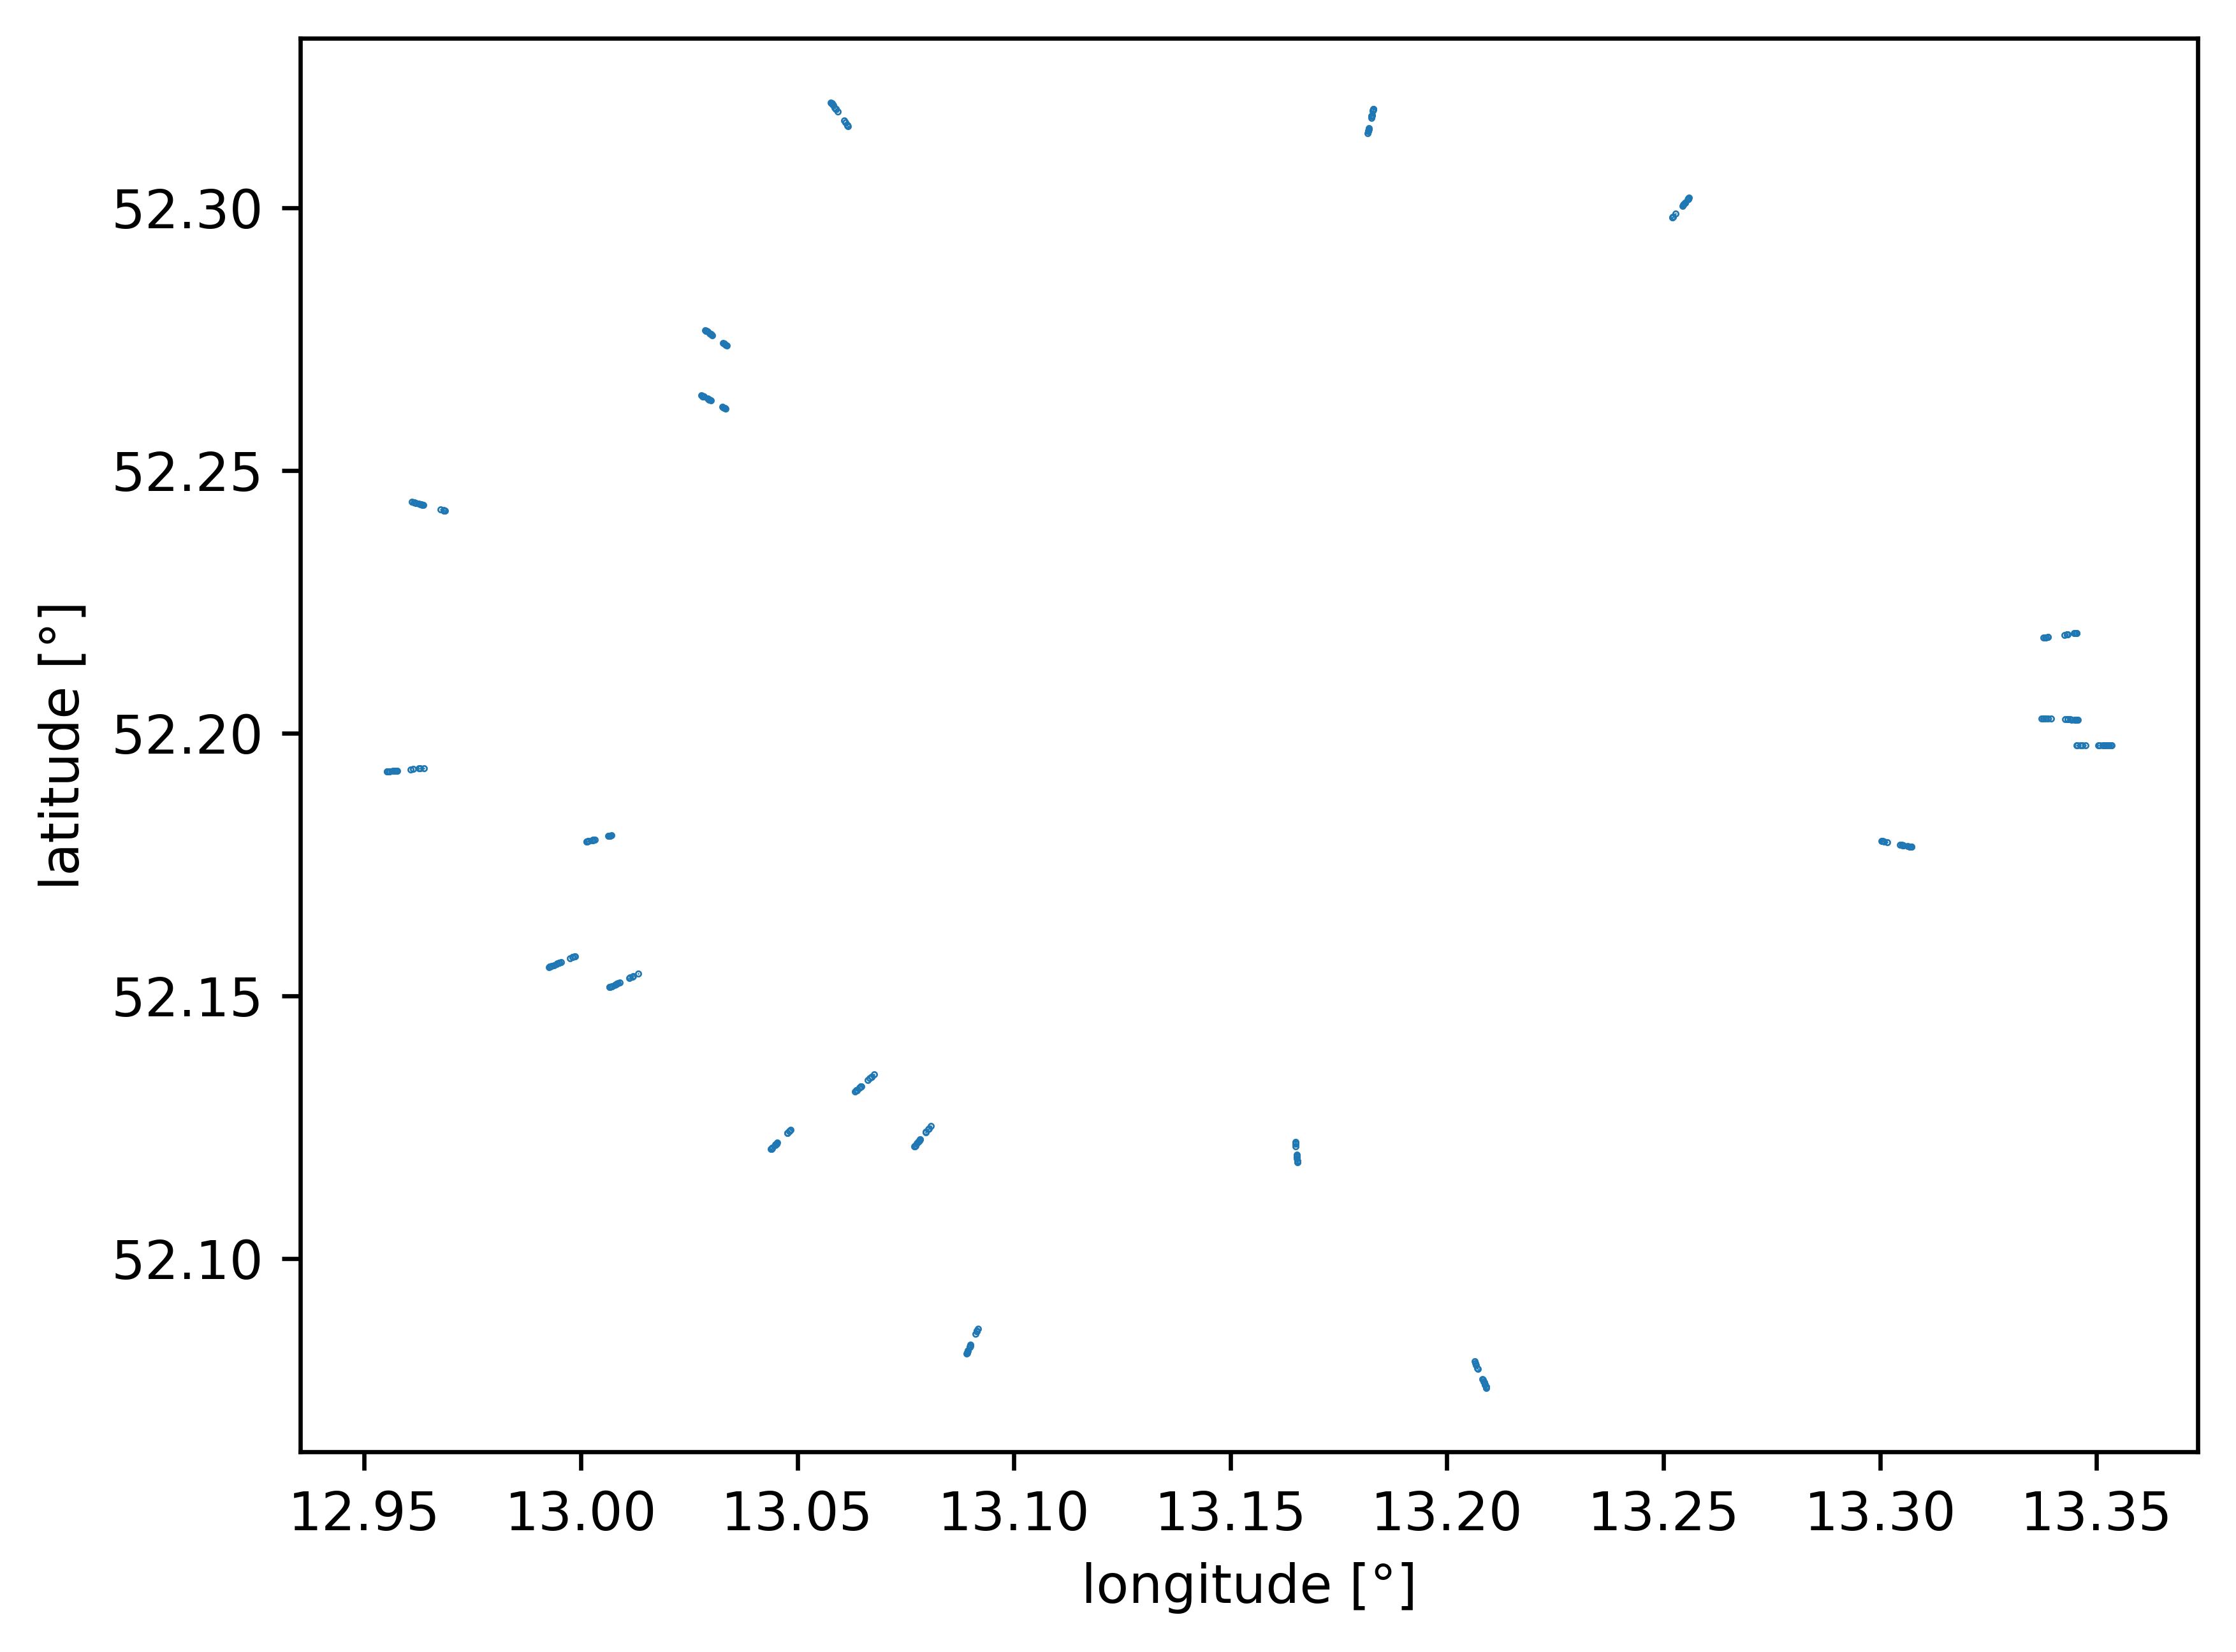

In [11]:
def flatten(xss):
    return [x for xs in xss for x in xs]

plt.scatter([p.longitude for p in flatten(points)],[p.latitude for p in flatten(points)], s=.1)
plt.xlabel("longitude [°]")
plt.ylabel("latitude [°]")

In [12]:
hmm = []

for i in range(len(starting_points)):    
    mean_lat = statistics.mean([points[x][i].latitude for x in range(len(points))])
    mean_long = statistics.mean([points[x][i].longitude for x in range(len(points))])
    
    std_lat = statistics.stdev([points[x][i].latitude for x in range(len(points))])
    std_long = statistics.stdev([points[x][i].longitude for x in range(len(points))])
    
    std_lat_meters = std_lat * 111_194.9
    std_long_meters = std_long * 111_194.9
    
    std_pythagorean_meters = hypot(std_lat_meters, std_long_meters)
    
    dist_start_mean = distance((mean_lat, mean_long), (starting_points[i].latitude, starting_points[i].longitude)).meters
    
    offset_relative = std_pythagorean_meters / dist_start_mean
    
    hmm.append([mean_lat, mean_long, std_pythagorean_meters, dist_start_mean, offset_relative])
    
avg_std_pythagorean_meters = statistics.mean([x[2] for x in hmm])
avg_dist_start_mean = statistics.mean([x[3] for x in hmm])
avg_offset_relative = statistics.mean([x[4] for x in hmm])

print(avg_std_pythagorean_meters, avg_dist_start_mean, avg_offset_relative)

262.50287251798454 12090.890245580835 0.021749435041101196


In [13]:
df = pd.read_csv("avg_network_update_time.csv")
df

,time
0,3.191521
1,3.986743
2,4.761933
3,6.091423
4,7.604627
5,9.172099
6,10.755551
7,12.387179
8,14.081027
9,15.936385


In [14]:
df3 = pd.DataFrame()
df3["Simulation"] = df["time"].iloc[:30]
df3["Precalculated"] = df["time"].iloc[30:].reset_index(drop=True)
df3["uav_count"] = range(4, 124, 4)
df

,time
0,3.191521
1,3.986743
2,4.761933
3,6.091423
4,7.604627
5,9.172099
6,10.755551
7,12.387179
8,14.081027
9,15.936385


In [15]:
log_files: list[SkybedLogFile] = []

print(sorted(glob("../logs/*.json")))

for file_name in sorted(glob("../logs/*.json")):
    with open(file_name, "r") as f:
        log_files.append(SkybedLogFile.model_validate_json(f.read()))

log_files

['../logs/log_2024-10-18T02:11:17.635304.json', '../logs/log_2024-10-18T02:16:26.151598.json', '../logs/log_2024-10-18T02:21:35.485286.json', '../logs/log_2024-10-18T02:26:45.915837.json', '../logs/log_2024-10-18T02:31:58.083236.json', '../logs/log_2024-10-18T02:37:11.748437.json', '../logs/log_2024-10-18T02:42:26.779424.json', '../logs/log_2024-10-18T02:47:43.126173.json', '../logs/log_2024-10-18T02:53:00.977198.json', '../logs/log_2024-10-18T02:58:20.535391.json', '../logs/log_2024-10-18T03:03:42.092972.json', '../logs/log_2024-10-18T03:09:05.106504.json', '../logs/log_2024-10-18T03:14:30.163048.json', '../logs/log_2024-10-18T03:19:56.704684.json', '../logs/log_2024-10-18T03:25:24.489725.json', '../logs/log_2024-10-18T03:30:53.903604.json', '../logs/log_2024-10-18T03:36:25.302224.json', '../logs/log_2024-10-18T03:41:57.714476.json', '../logs/log_2024-10-18T03:47:32.853813.json', '../logs/log_2024-10-18T03:53:08.949639.json', '../logs/log_2024-10-18T03:58:46.865566.json', '../logs/log

[SkybedLogFile(avg_network_update_count=580.0, avg_network_update_time=0.5172449645655183, uavs_final_state=[UAV(uav_id='0', uav_type='1', speed=55.15908805880605, direction=93.2100301054668, vertical_speed=-1.5885683833831, container=None, evaluation=UAVEvaluation(network_update_count=0), position=Point(52.206970107572864, 13.217210817572308, -191.5804951986836), currently_in_collision=False, previously_in_collision=False, latitude=52.206970107572864, longitude=13.217210817572308, altitude=-191.5804951986836), UAV(uav_id='1', uav_type='1', speed=46.06625452157855, direction=210.01753420381124, vertical_speed=-0.4680609169528829, container=None, evaluation=UAVEvaluation(network_update_count=0), position=Point(52.178439663963196, 13.130736341828678, 161.7454156801153), currently_in_collision=False, previously_in_collision=False, latitude=52.178439663963196, longitude=13.130736341828678, altitude=161.7454156801153), UAV(uav_id='2', uav_type='1', speed=55.11608408314448, direction=90.1822

In [16]:
for i, log_file in enumerate(log_files):
    df3.loc[i, "Precalculated"] = log_file.avg_network_update_time
df3

,Simulation,Precalculated,uav_count
0,3.191521,0.517245,4
1,3.986743,0.534765,8
2,4.761933,0.551474,12
3,6.091423,0.567138,16
4,7.604627,0.584799,20
5,9.172099,0.601207,24
6,10.755551,0.618562,28
7,12.387179,0.635600,32
8,14.081027,0.653601,36
9,15.936385,0.669651,40


<Axes: xlabel='Number of UAVs', ylabel='Average Network Update Time [s]'>

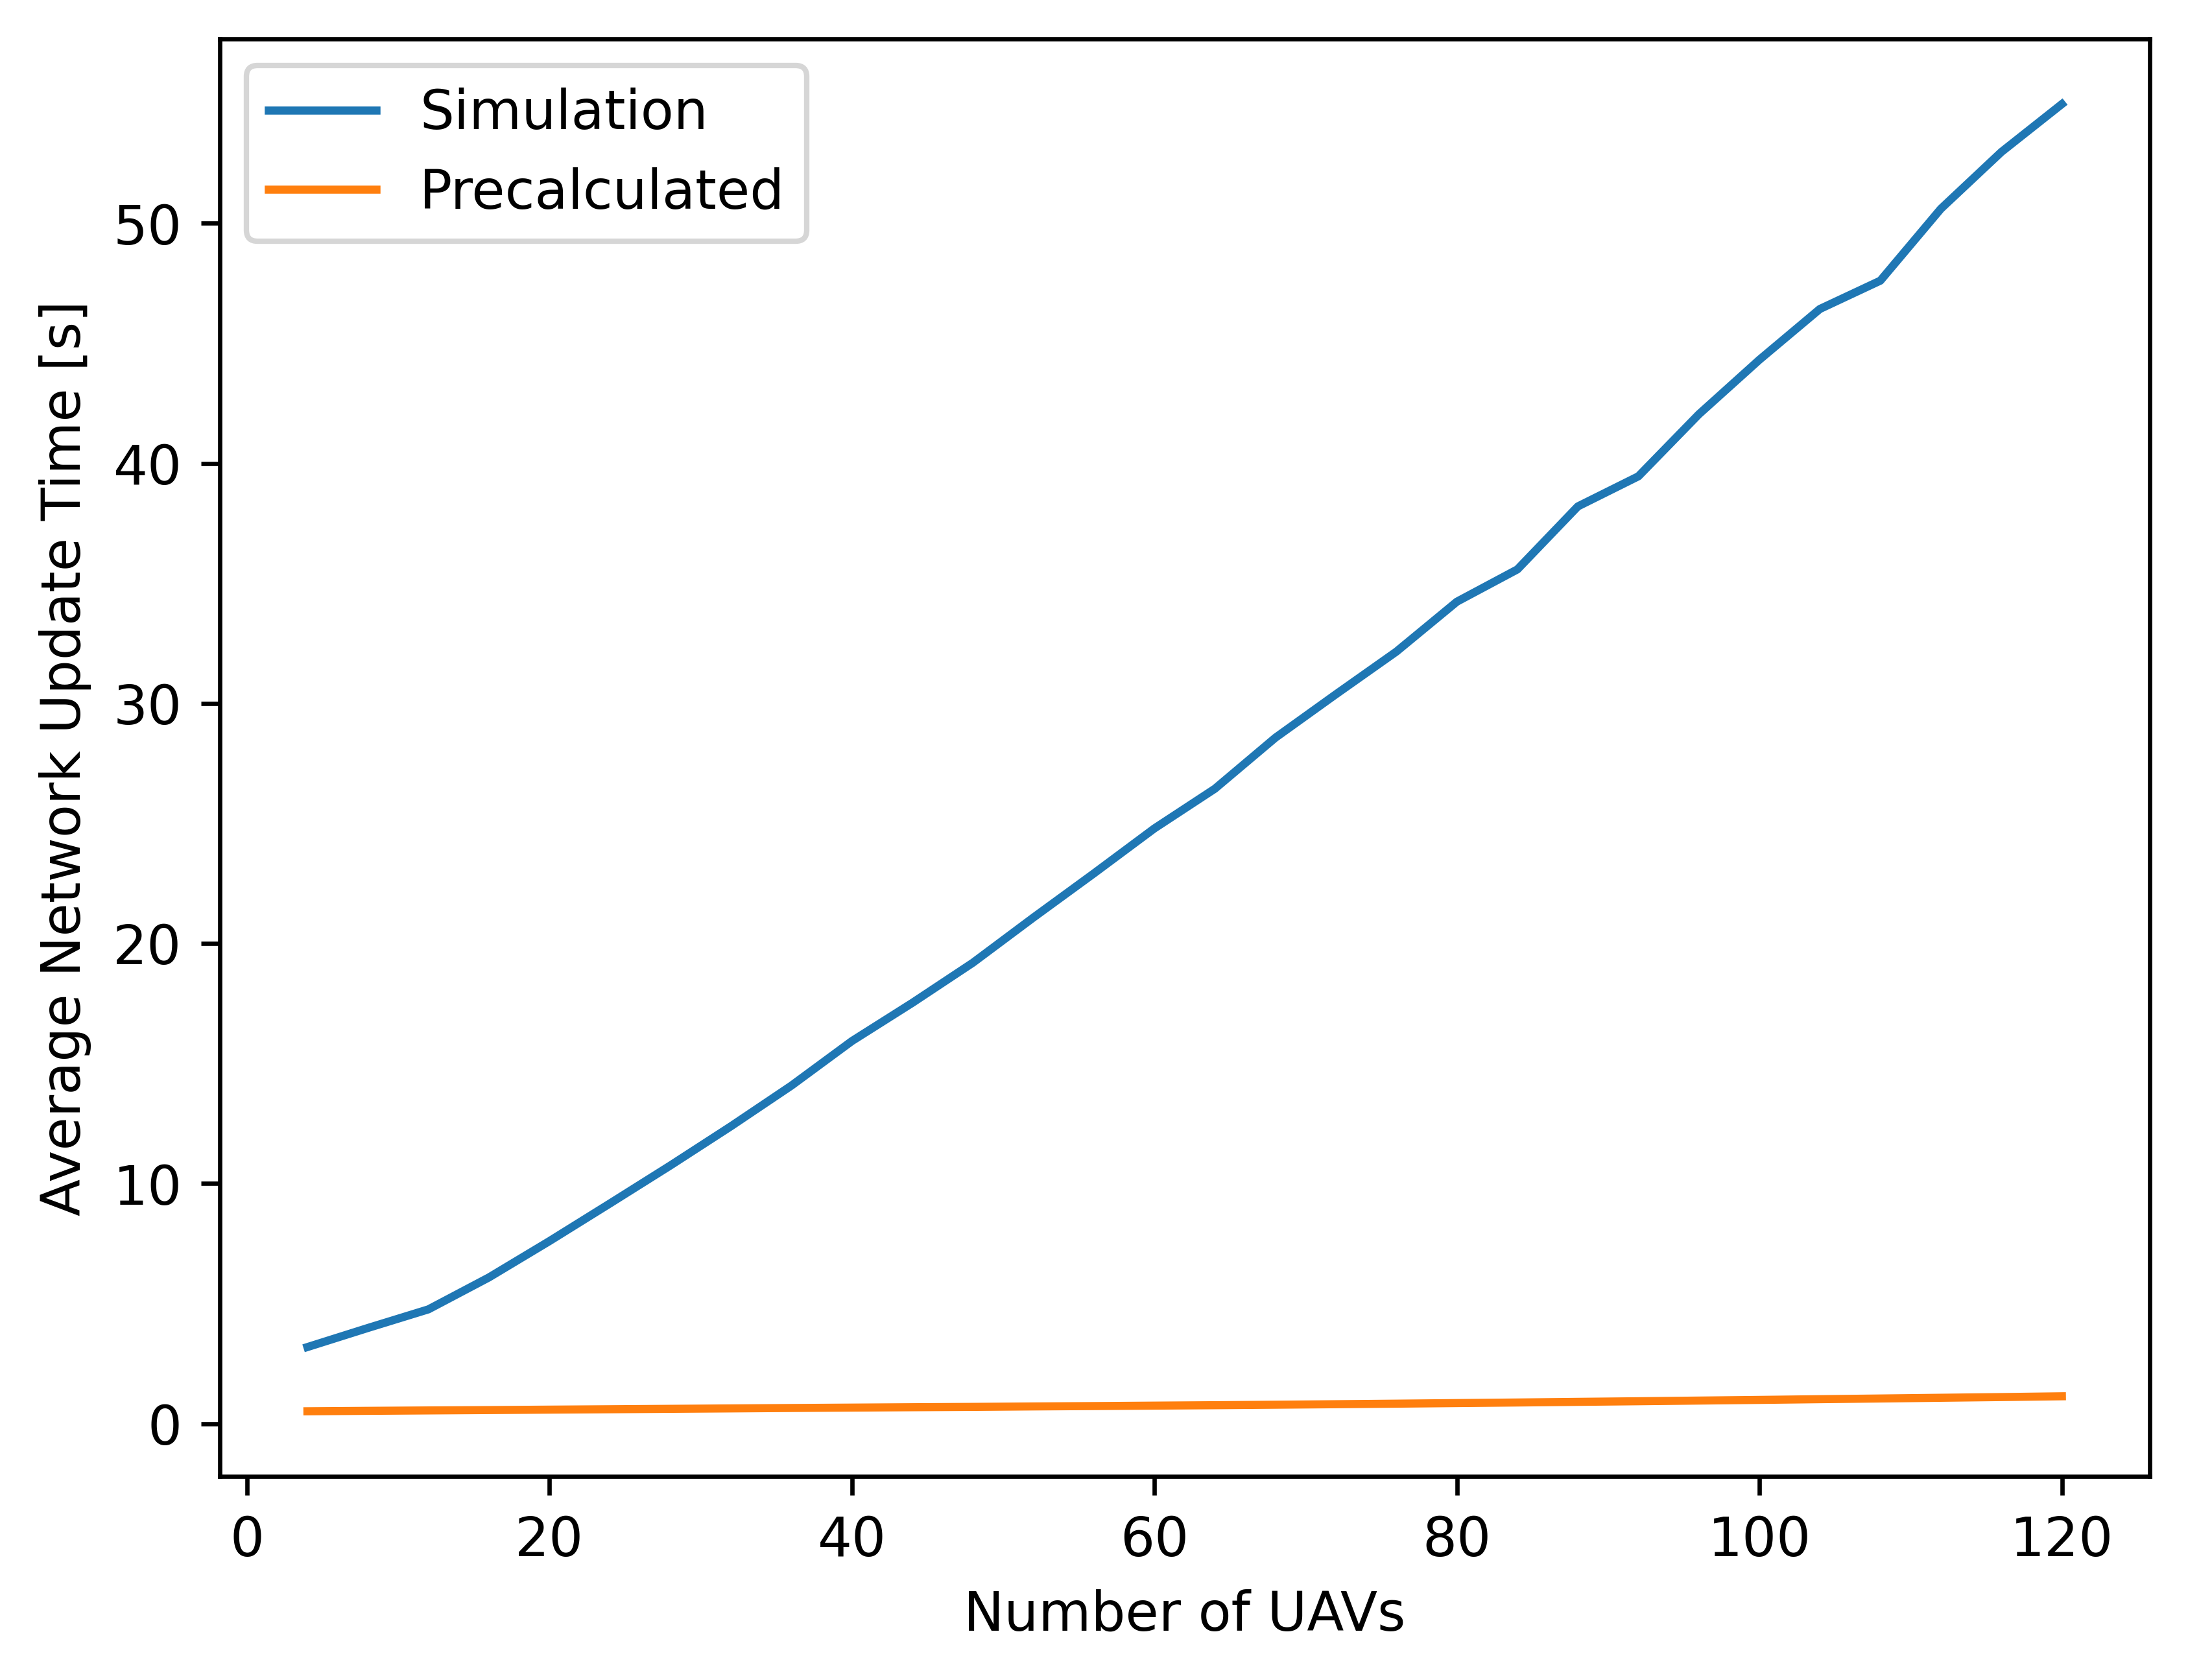

In [17]:
df3.plot(x="uav_count", y=["Simulation", "Precalculated"], xlabel="Number of UAVs", ylabel="Average Network Update Time [s]")

In [18]:
print("hm")

hm
